'\n3 Reconstruct an image missing from the training data\ni_img=39 was not used for computing the eigen values u\nsee what happens if you use this image\n'

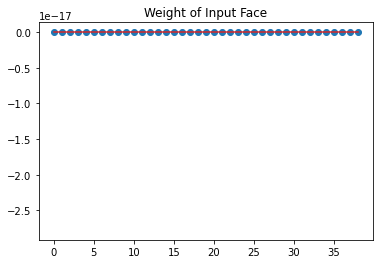

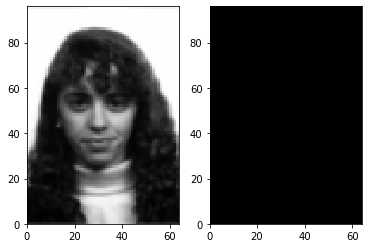

In [3]:
# Face recognition by Santiago Serrano
# http://www.pages.drexel.edu/~sis26/Eigencode.htm
# Modified by Eric Salathe Dec 2015
from numpy import (
    linspace,array,zeros,log,exp,sin,cos,sqrt,pi,e, 
    ones, arange, zeros, real, imag, sign, shape, dot, size,
    mean
    )

from numpy.random import rand

from matplotlib.pyplot import (
    plot,xlabel,ylabel,legend,show, figure, subplot, title, tight_layout, stem, pcolormesh,
    get_cmap
    )   
from scipy.io import loadmat

'''
Read in the image database
This fills an 96x64x40  array called  pics where each 96x64 layer is a
picture and there are 40 pictures (layers). 
The first pictur is pics[:,:,0]
To make  picture number i into a single column vector, use
X=pics[:,:,i].reshape((row*col,))
'''
# read in images

infile=loadmat('/Users/kingflight/Downloads/ImageProcessing/Faces_.mat')
pics = infile['pics']

row, col, mpictot = shape(pics) # image size
npixel = row*col # total pixels in each image

'''
Read in the EigenFaces, which form a basis for our
  vector space of faces. Only the top few eigenfaces are necesary
  to represent the dataset, and we can flatten the vector space. 
'''
infile=loadmat('/Users/kingflight/Downloads/ImageProcessing/EigenFaces.mat')
u=infile['u']
nn, meig = shape(u) # meig is the number of eigen vectors in our basis

'''
1. Reconstruct an image in the training set using a reduced basis
'''

# Select an image from the training set onto eigen vectors
i_img = 2 # select an arbitrary image
picture = pics[:,:,i_img]

# put the face into a vector
X = picture.reshape((row*col,),order='F')

# get the coordinates of this face in our eigenvector space using the dot prodcuct (dot(a,b) in numpy)
#         sig_i = X•u_i

sig=zeros(meig)
### Create a for loop and compute each sig[i]


'''
Now reconstruct the image using a subset of eigenvectors
here we sum over each eigenvector (ie columns of u(:,i)) after multiplying by
the appropriate coordinate value (coord):

Xrec = sig(1)*u(1) + sig(2)*u(2) + ... + sig(n)*u(n)

where sig(i) are the coordinates and u(i) are the eigenvectors
but we use a for loop to do this.
'''

m_rec = 20 # number of images to use for reconstruction < meig


# Loop and sum over the eigenvalues
Xrec = zeros(size(X)) # all zeros and size of the original vector
### Create a for loop and sum to get Xrec



# Note that if we were to take the above sum for m_rec=mpic, we'd be
# exactly inverting the computation in the earlier loop that computs the
# coordinates. By truncating the sum to fewer terms, we get an approximation. 


# plot the image coordinates
figure(1)

ll = arange(meig)
stem(ll,sig) # this makes a "stem plot"
title('Weight of Input Face') # ,'fontsize',14)

# draw the face
figure(2)
subplot(1,2,1)
cmap=get_cmap('gray')
pcolormesh(picture,cmap=cmap) 

# draw the reconstructed image.
subplot(1,2,2)
pcolormesh(Xrec.reshape((row,col),order='F'),cmap=cmap) 


'''
2 Reconstruct a messed-up image 
'''

# Select an image and add some random speckle of specified amplitude
i_img = 2 # seclect an arbitrart image
noiselevel=2 # the magnitude of the noise relative to average
picture = pics[:,:,i_img] + rand(row,col) * noiselevel*mean(pics[:,:,i_img]) 

#### Same as above from  picture = pics[:,:,i_img]  ########

'''
3 Reconstruct an image missing from the training data
i_img=39 was not used for computing the eigen values u
see what happens if you use this image
'''